# 데이터에 대한 시각화를 진행하는 파일입니다.
- github로 보실경우 plotly로 그려진 그래프는 보여지지 않는 오류가 발생하오니 위 google colab 링크로 와주시면 감사하겠습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/2nd_project_elice/refine_data

/content/drive/MyDrive/2nd_project_elice/refine_data


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import cv2

In [4]:
articles = pd.read_csv("articles.csv", index_col = 0)
customers = pd.read_csv("customers.csv", index_col = 0)
total = pd.read_csv("total_count_prod.csv", index_col = 0)

In [5]:
test = pd.read_csv("age_id&attribute&fullarticle_id.csv", index_col = 0)

In [6]:
total.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,age_id,attribute,count
2065636,2020-06-01,14394caee60b3ebc3c111b66b28164e03a4c2ba247c14f...,741356002,0.033881,2,1,25.0,1,Woman,5820
2064792,2020-06-01,0db2f7adcaccca01e7bab8e45d190fcae8e303b5c0e66f...,706016001,0.033881,2,2,22.0,1,Young,4097
2063941,2020-06-01,07005038773aeeff70739a2d12fe2f13861fc52c214059...,720125001,0.033881,2,26,26.0,1,kids,3868
2070939,2020-06-01,405ee30df140b9583ea0c2ae563d43c2642ef6d28af179...,841383002,0.008458,2,1,55.0,4,Woman,3862
2064751,2020-06-01,0d8c27b8ba9ec7fc0b5fa2b9ddc48eb7f29fb26a8c1baa...,824337001,0.033881,2,2,20.0,1,Woman,3777


In [7]:
total_top10_articleid = total[['article_id', 'count']].iloc[:10, :]

In [8]:
total_top10_articleid

,article_id,count
2065636,741356002,5820
2064792,706016001,4097
2063941,720125001,3868
2070939,841383002,3862
2064751,824337001,3777
2066929,759871002,3748
2065603,759871001,3623
2064462,841383003,3584
2063707,783346018,3351
2064165,714790020,3303


In [9]:
merge_test = pd.merge(articles, total_top10_articleid, how='inner', on='article_id')

In [10]:
merge_test.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,count
0,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...,4097
1,714790020,714790,Mom Fit Ultra HW,272,Trousers,Garment Lower body,1010023,Denim,72,Blue,...,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"5-pocket, ankle-length jeans in washed, stretc...",3303
2,720125001,720125,SUPREME RW tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...,3868
3,741356002,741356,Pamela Shorts HW,274,Shorts,Garment Lower body,1010023,Denim,72,Blue,...,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1025,Shorts,"Short, 5-pocket shorts in washed denim with a ...",5820
4,759871001,759871,Tilda tank,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,"Cropped, fitted top in cotton jersey with narr...",3623


### 프론트엔드로 넘겨주는 전체 top 10 판매량 제품 json 데이터

In [90]:
# total_visualization_json = merge_test.loc[:, ["product_type_name", "count"]].reset_index(drop = True)
# total_visualization_json.to_json('../visualization_json/total_visualization.json', orient='records')

### 전체 데이터 TOP 5~10 제품 유형 비교 시각화

In [11]:
import plotly.express as px

In [12]:
df = merge_test
fig = px.pie(df, values='count', names='prod_name')
fig.update_layout(title_text='전체 TOP 10 판매량 제품', title_x=0.45)
fig.show()

In [13]:
df = merge_test
fig = px.pie(df, values='count', names='product_type_name', color='product_type_name', color_discrete_map={
    'Vest top' : 'red',
    'Trousers' : 'cyan',
    'Shorts' : 'blue',
    'Leggings/Tights' : 'pink'})
fig.update_layout(title_text='전체 TOP 10 판매량 제품 유형', title_x=0.47)
fig.show()

In [14]:
cd ../refine_data

/content/drive/MyDrive/2nd_project_elice/refine_data


In [15]:
man_woman = pd.read_csv("age_id&attribute&fullarticle_id.csv", index_col = 0)
refine_articles = pd.read_csv("articles.csv", index_col = 0)

In [16]:
man_woman

,age_id,attribute,article_id,len
0,0,Man,685816001 685816002 685816041 685814003 68581...,11870
1,0,Woman,741356002 372860002 673396002 832453002 37286...,71740
2,1,Man,685816001 685816002 685816041 608945001 57534...,71150
3,1,Woman,741356002 749699002 753737001 716672001 85912...,207590
4,2,Man,685816001 685816002 598755015 598755001 68581...,47610
5,2,Woman,841383002 749699002 841383003 753737001 74969...,195590
6,3,Man,685811001 685811002 730013002 687635004 68581...,50380
7,3,Woman,741356002 841383003 841383002 783346018 57279...,174180
8,4,Man,685816001 687635004 685816002 685811002 68581...,51160
9,4,Woman,783346018 841383003 783346016 783346020 81736...,162740


### 연령대/성별 TOP 5~10 제품 유형 비교 시각화

In [17]:
age_dict = {0 : "10", 1 : "10", 2 : "20", 3 : "20", 4 : "30", 5 : "30", 6 : "40", 7 : "40", 8 : "50", 9 : "50", 10 : "60", 11 : "60"}
for i in range(12): ## 최대 12
  gender = "남성"
  if i % 2 == 0:
    temp = man_woman['article_id'].iloc[i].split()[:10]
    test = pd.DataFrame(temp, columns=['article_id'])
    test = test['article_id'].astype(int)
    merge_test = pd.merge(refine_articles, test, how='inner', on='article_id')
    fig = px.pie(merge_test, names='prod_name')
    fig.update_layout(title_text= f'{age_dict[i]}대 {gender} TOP 10 판매량 제품', title_x=0.46)
    fig.show()
    fig = px.pie(merge_test, names='product_type_name')
    fig.update_layout(title_text= f'{age_dict[i]}대 {gender} TOP 10 판매량 제품 유형', title_x=0.47)
    fig.show()
  else:
    gender = "여성"
    temp = man_woman['article_id'].iloc[i].split()[:10]
    test = pd.DataFrame(temp, columns=['article_id'])
    test = test['article_id'].astype(int)
    merge_test = pd.merge(refine_articles, test, how='inner', on='article_id')
    fig = px.pie(merge_test, names='prod_name')
    fig.update_layout(title_text= f'{age_dict[i]}대 이상 {gender} TOP 10 판매량 제품', title_x=0.46)
    fig.show()
    fig = px.pie(merge_test, names='product_type_name')
    fig.update_layout(title_text= f'{age_dict[i]}대 {gender} TOP 10 판매량 제품 유형', title_x=0.47)
    fig.show()

### 프론트엔드로 넘겨주는 10대/50대 남성 top 10 판매량 제품 json 데이터

In [68]:
# temp = man_woman['article_id'].iloc[0].split()[:10]
# test = pd.DataFrame(temp, columns=['article_id'])
# test = test['article_id'].astype(int)
# merge_test = pd.merge(refine_articles, test, how='inner', on='article_id')
# age10man_visualization_json = merge_test.loc[:, ['product_type_name']].reset_index(drop = True)
# age10man_visualization_json.to_json('../visualization_json/age10man_visualization.json', orient='records')

In [66]:
# temp = man_woman['article_id'].iloc[8].split()[:10]
# test = pd.DataFrame(temp, columns=['article_id'])
# test = test['article_id'].astype(int)
# merge_test = pd.merge(refine_articles, test, how='inner', on='article_id')
# age50man_visualization_json = merge_test.loc[:, ['product_type_name']].reset_index(drop = True)
# age50man_visualization_json.to_json('../visualization_json/age50man_visualization.json', orient='records')

### 이미지 로드 함수

In [ ]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

### 전체 판매량 top 10과 연령대/성별 판매량 top10

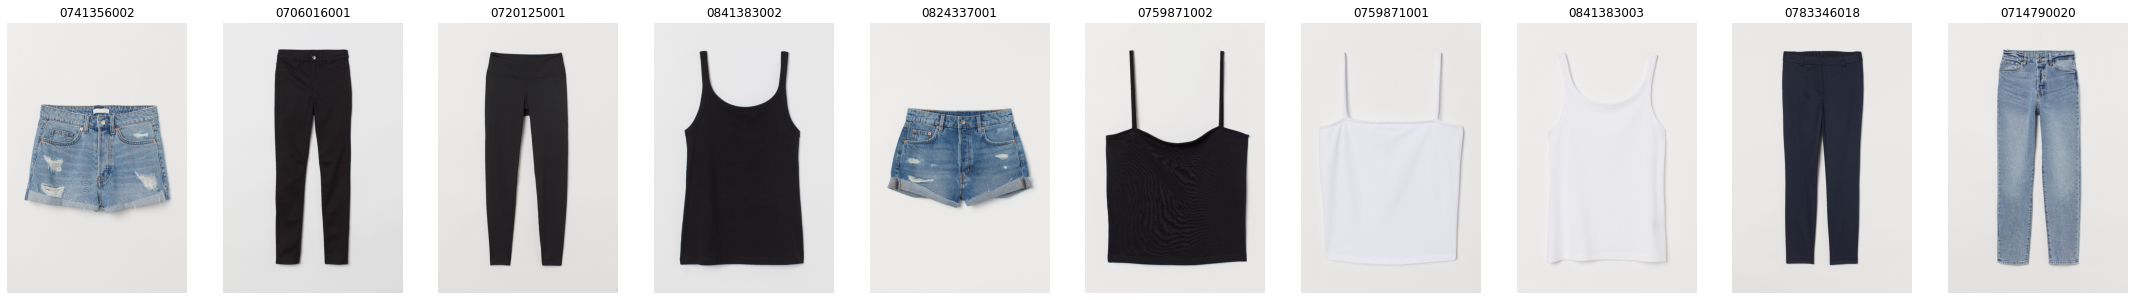

In [ ]:
show_images(total_top10_article_id['article_id'].tolist(), 10)

In [ ]:
for i in range(12):
  show_images(man_woman.iloc[i,2].split()[:10], 10)

Output hidden; open in https://colab.research.google.com to view.

# Articles 에 해당하는 그래프 (확장 가능)

In [ ]:
pd.options.display.max_columns = None
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


# 1. 상품 대분류 분포

In [ ]:
import plotly.express as px
label = articles.index_group_name.unique()
count = articles.index_group_name.value_counts()
fig = px.pie(articles, values=count, names=label,color_discrete_sequence=px.colors.sequential.Purpor)
fig.show()

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

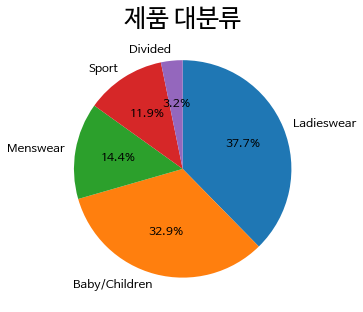

In [ ]:
label = articles.index_group_name.unique()
count = articles.index_group_name.value_counts()
plt.figure(figsize=(5, 5))
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.pie(count.sort_values(ascending=False), 
        labels = label, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.title("제품 대분류", fontsize = 25)
plt.show()

# 2. 상품 중분류 분포

In [ ]:
name = articles.product_group_name.unique()
sizes = articles.product_group_name.value_counts()
fig = px.bar(articles, y=sizes, x=name, color = name,color_discrete_sequence=px.colors.sequential.Plotly3
            )
fig.update_layout(
    title="제품 중분류",
    xaxis_title="제품 분류",
    yaxis_title="개수"
)
fig.show()

# 3. 상품 소분류 분포

In [ ]:
pd.options.display.max_rows = None
articles.groupby(["product_group_name", "product_type_name"]).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

# customers 에 해당하는 그래프 (확장 가능)

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


# 1. 나이 분포

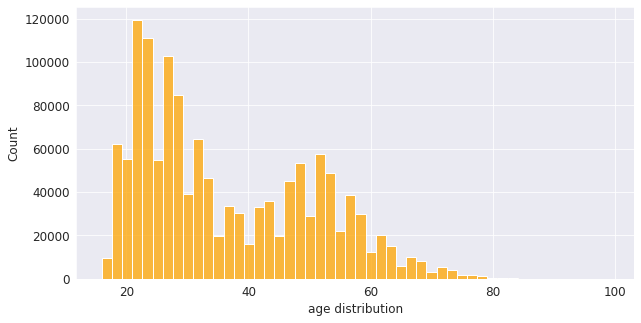

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('age distribution')
plt.show()

# 2. 회원/비회원 분포

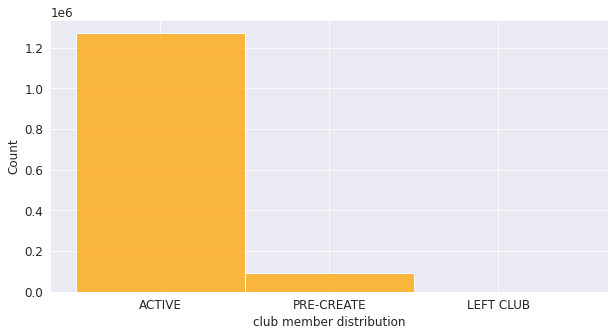

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('club member distribution')
plt.show()

# 3. 광고 메시지를 받는지에 대한 분포

In [ ]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

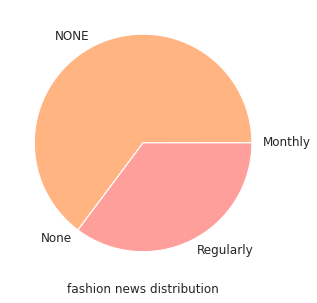

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('fashion news distribution')
plt.show()

# Transactions 에 해당하는 그래프 (확장 가능)

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# 연도별 매출 현황

In [ ]:
df = transactions.merge(articles,on="article_id")

In [ ]:
def create_year(x):
    year = pd.DatetimeIndex(x).year 
    return year

df['year'] = create_year(df['t_dat'])

In [ ]:
def create_month(x):
    month = pd.DatetimeIndex(x).month_name() 
    return month

df['month'] = create_month(df['t_dat'])

In [ ]:
def create_day(x):
    day = pd.DatetimeIndex(x).day_name() 
    return day

df['day'] = create_day(df['t_dat'])

In [ ]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,year,month,day
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,September,Thursday
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,September,Thursday
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,September,Thursday
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,September,Thursday
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1338,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",2018,September,Thursday


In [ ]:
data = df.groupby("year")['price'].sum().reset_index()

In [ ]:
data.head()

,year,price
0,2018,130873.959305
1,2019,455604.877966
2,2020,298167.136780


In [ ]:
px.line(data, x="year",y="price")

###  2022-04 - 06 데이터를 사용한 이유

In [ ]:
cd /content/drive/MyDrive/2nd_project_elice/inital_data

/content/drive/MyDrive/2nd_project_elice/inital_data


In [ ]:
import datetime as dt

In [ ]:
transactions = pd.read_csv("transactions_train.csv")

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

In [ ]:
begin = transactions['t_dat'].min()
end = transactions['t_dat'].max()
print('Date range is from {} to {}.'.format(begin.date(), end.date()))

Date range is from 2018-09-20 to 2020-09-22.


In [ ]:
t_per_day = transactions.groupby('t_dat',as_index=False).count()

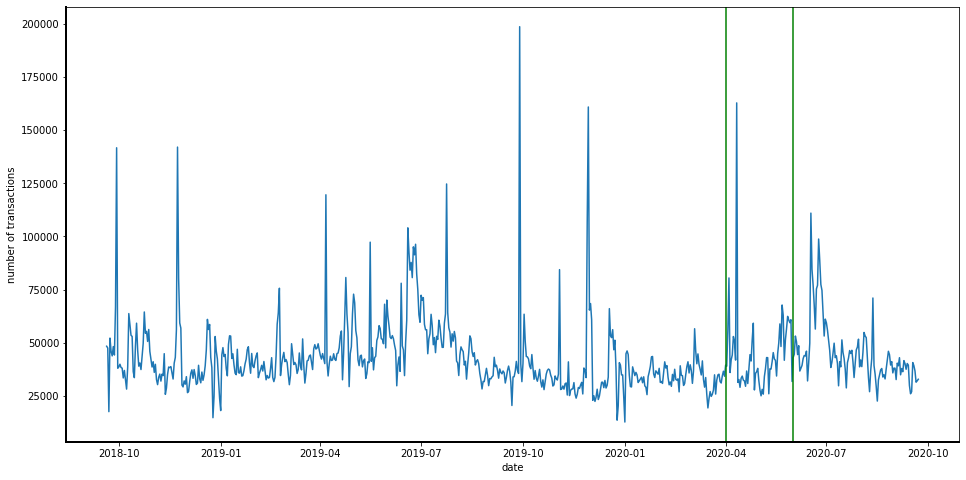

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

ax.axvline(x=dt.datetime(2020,4,1), c='green')
ax.axvline(x=dt.datetime(2020,6,1), c='green')

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show()

- 2020-04 ~ 06 거래내역 데이터만 사용한 이유
1. 거래량이 많아서
2. 현재와 비교해서 트렌드가 가장 최근(2018~2020)
3. 이 맘 때와 같은 제품을 소개하고자